# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
btc_resp = requests.get(btc_url).json()
btc_price_resp = btc_resp["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_resp = requests.get(eth_url).json()
eth_price_resp = eth_resp["data"]["1027"]["quotes"]["CAD"]["price"]


# Compute current value of my crpto
my_btc_value = my_btc * btc_price_resp
my_eth_value = my_eth * eth_price_resp

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $55930.48
The current value of your 5.3 ETH is $10448.16


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2021-01-27", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
cu_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today
).df

# Preview DataFrame
cu_portfolio.head()

AGG                                     \
                               open    high       low   close   volume   
time                                                                     
2021-01-27 00:00:00-05:00  117.6100  117.67  117.0400  117.52  3509666   
2021-01-28 00:00:00-05:00  117.4800  117.49  117.2900  117.43  4440895   
2021-01-29 00:00:00-05:00  117.1563  117.40  116.5625  117.32  7119889   
2021-02-01 00:00:00-05:00  117.2000  117.26  117.0915  117.21  5469814   
2021-02-02 00:00:00-05:00  116.9900  117.09  116.9700  117.05  4694446   

                              SPY                                       
                             open    high       low   close     volume  
time                                                                    
2021-01-27 00:00:00-05:00  380.22  380.32  372.0100  374.44   99246554  
2021-01-28 00:00:00-05:00  376.36  381.93  375.8900  377.60   75229306  
2021-01-29 00:00:00-05:00  375.63  376.67  368.2700  370.19  106397082  
2021-02-01 00:00:00-05:00  373.72  377.34  370.3760  376.18   64056510  
2021-02-02 00:00:00-05:00  379.65  383.22  376.3181  381.54   53979346

In [11]:
# Pick AGG and SPY close prices
spy_close_price = float(cu_portfolio["SPY"]["close"][0])
agg_close_price = float(cu_portfolio["AGG"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.52
Current SPY closing price: $374.44


In [12]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18722.00
The current value of your 200 AGG shares is $23504.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_value = [
     my_btc_value + my_eth_value,
     my_spy_value + my_agg_value,
]

df_savings = pd.DataFrame(total_value, columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,66378.639958
shares,42226.000000


<AxesSubplot:title={'center':'Person Portfolio Breakdown'}, ylabel='amount'>

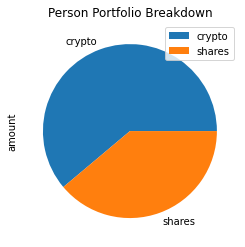

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Person Portfolio Breakdown")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_money = float(df_savings.sum())

# Validate saving health
if total_money > emergency_fund:
    print ("Congratulaitons, you are doing great. You have exceeded your emergency fund!")
elif total_money == emergency_fund:
    print (" Congratulaitons on meeting your financial goal! You have met your target in emergency fund!")
else:
    print("You are ${(emergency_fund - total_money):0.2f}  amount from reaching your emergency fund goal")
    

Congratulaitons, you are doing great. You have exceeded your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end = end_date
).df


# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [19]:
# Printing the simulation input data
mc_thirty_year.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996785,1.008843,0.993709,1.001523,1.010481,0.988456,0.993944,1.016663,0.995172,1.008842,...,1.001962,1.002124,1.014796,1.005873,1.007210,1.004140,0.989819,0.997125,0.999667,1.006673
2,0.999951,1.015634,0.990698,0.987914,1.023487,0.990774,0.994246,1.010389,0.992197,1.014519,...,1.004597,1.001263,1.017302,1.017137,0.998678,0.993261,0.983867,1.006599,1.007682,1.000207
3,0.991226,1.012696,0.995603,0.987120,1.010619,0.997553,0.990995,1.020351,0.993095,1.005701,...,0.999689,1.005700,1.018442,1.007098,1.009617,0.976808,0.989623,1.008862,1.003047,0.999198
4,0.987965,1.009903,0.991417,0.977483,0.998184,1.003408,0.982123,1.033215,0.997674,1.002808,...,0.998661,1.003433,1.013812,1.009639,1.012977,0.978134,0.988482,1.014007,1.020024,0.994933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.254126,2.254692,3.650008,7.264766,13.848061,12.380854,12.087361,11.217194,8.037002,3.665894,...,5.548216,17.424635,5.764087,13.998601,17.177236,5.500701,23.164784,7.805636,20.965167,10.667336
7557,12.270791,2.255602,3.671068,7.109737,13.922135,12.346714,12.059233,11.190528,8.158654,3.649738,...,5.608084,17.345486,5.719306,14.186637,17.258408,5.507500,23.329930,7.822708,21.247462,10.675322
7558,12.039294,2.257605,3.710619,7.091472,14.079324,12.279993,12.192050,11.183170,8.113715,3.652690,...,5.615643,17.409990,5.710355,14.297193,17.289332,5.513050,23.200544,7.902798,21.030415,10.639998
7559,11.966300,2.249362,3.704942,7.040201,14.079727,12.355519,12.239556,11.360910,8.258225,3.667678,...,5.664574,17.547854,5.709003,14.206647,17.210180,5.505124,23.515460,7.855211,20.876632,10.732163


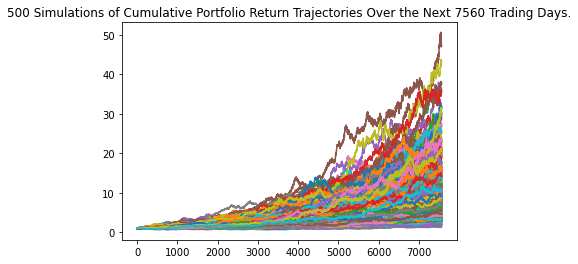

In [21]:
# Plot simulation outcomes
mc_line_plot = mc_thirty_year.plot_simulation()

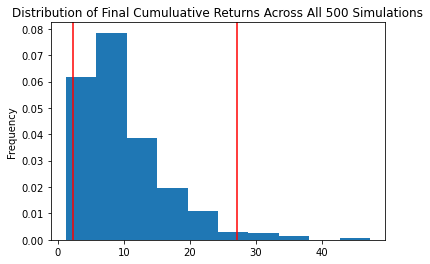

In [22]:
# Plot probability distribution and confidence intervals
mc_probability_plot = mc_thirty_year.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results

summary_stat = mc_thirty_year.summarize_cumulative_return()


# Print summary statistics
print(summary_stat)

count           500.000000
mean             10.102822
std               6.577832
min               1.211846
25%               5.624370
50%               8.780992
75%              12.495743
max              47.326350
95% CI Lower      2.303050
95% CI Upper     27.214922
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stat[8] * initial_investment,2)
ci_upper = round(summary_stat[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $46061.0 and $544298.45


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stat[8] * initial_investment,2)
ci_upper = round(summary_stat[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $69091.5 and $816447.67


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_five_year_retirement = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_five_year_retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006852,0.994611,1.015636,0.999400,1.009499,0.998326,1.001088,1.003261,1.000534,1.005587,...,0.997948,0.996866,1.011885,0.998928,0.991623,0.993293,0.995395,0.997641,0.996025,1.014247
2,1.001831,0.998612,1.028631,1.005006,0.997379,0.991484,0.995846,1.002079,0.990180,0.995847,...,0.989580,0.996184,1.019660,0.998020,0.995791,0.982525,0.994022,1.000437,0.991714,1.022728
3,1.009219,0.991980,1.030127,1.001483,0.997447,0.976492,0.989797,1.009079,0.997402,0.993870,...,0.999561,1.006127,1.013523,0.994723,0.992179,0.986341,1.008695,1.000543,0.984422,1.033291
4,0.997012,0.994417,1.025916,1.009640,0.998748,0.969293,0.983579,1.006307,1.008021,0.993805,...,1.003143,0.991884,1.013245,0.978019,0.997057,0.986685,1.008438,1.002711,0.984045,1.037561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.156739,1.956197,1.413686,1.718779,2.213662,0.871170,1.477093,1.634267,1.582214,1.522625,...,1.025182,1.878930,1.661777,1.443174,1.125727,1.587838,1.511294,1.796245,1.487918,1.299184
1257,1.170150,1.945869,1.416490,1.744128,2.182919,0.866909,1.485083,1.628253,1.588057,1.530836,...,1.026513,1.881129,1.657775,1.444642,1.139132,1.608416,1.531344,1.798037,1.477575,1.294794
1258,1.161350,1.959786,1.410101,1.736215,2.181504,0.871263,1.491910,1.632605,1.579987,1.521926,...,1.021728,1.871925,1.673248,1.450780,1.131027,1.623246,1.520610,1.780464,1.467607,1.311475
1259,1.167342,1.957113,1.395931,1.717017,2.184333,0.868619,1.484017,1.631247,1.589303,1.519289,...,1.023923,1.866223,1.642728,1.460775,1.136830,1.628022,1.535980,1.765718,1.456589,1.316419


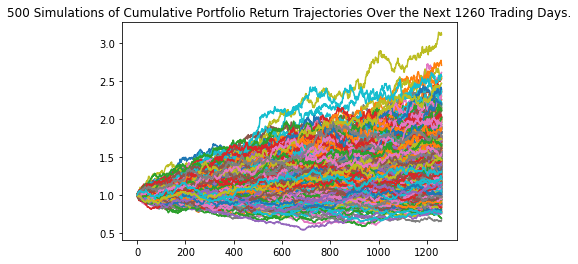

In [31]:
# Plot simulation outcomes
plot_simulaiton_outcome = mc_five_year_retirement.plot_simulation()

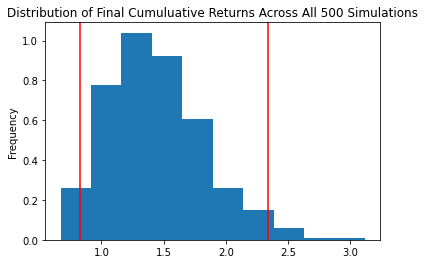

In [32]:
# Plot probability distribution and confidence intervals
five_year_probability = mc_five_year_retirement.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stat_five = mc_five_year_retirement.summarize_cumulative_return()

# Print summary statistics
print(summary_stat_five)

count           500.000000
mean              1.436985
std               0.385513
min               0.671818
25%               1.157227
50%               1.396602
75%               1.662622
max               3.116182
95% CI Lower      0.828978
95% CI Upper      2.338669
Name: 1260, dtype: float64


In [34]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_stat_five[8] * initial_investment,2)
ci_upper_five = round(summary_stat_five[9] * initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $49738.7 and $140320.14


### Ten Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_year_retirement = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [36]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_year_retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998442,1.001678,1.002862,1.000231,1.000840,1.006600,0.992519,1.004426,1.004137,1.001870,...,0.982020,0.999394,1.000906,1.004948,1.016053,1.008782,0.991890,0.993778,1.008774,0.999256
2,1.006757,0.997593,1.008021,1.006600,1.004647,1.003663,0.995973,1.009643,1.003577,1.004261,...,0.983411,0.997264,1.010730,0.997233,1.008000,1.009632,0.997067,0.995586,1.009331,0.997531
3,1.012438,1.001867,1.014227,1.005712,0.997134,1.008368,0.992300,1.012788,1.002327,1.015137,...,0.994480,1.012754,1.021993,1.001656,1.015705,1.024174,0.994441,1.009913,1.030916,0.994275
4,1.025192,0.991316,1.016254,1.011518,0.996492,0.984221,0.989656,1.008377,1.014267,1.022042,...,0.992707,1.021213,1.025427,1.010299,1.018571,1.020492,0.988288,1.017864,1.022630,0.994057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.110674,2.948396,3.960271,2.421642,1.656351,1.929261,2.097743,2.382550,5.322613,1.808905,...,1.654086,1.103751,1.738180,1.992689,1.478880,2.655770,4.124161,3.633865,1.623871,2.995801
2517,4.096167,2.941143,3.972562,2.385030,1.655563,1.922756,2.091854,2.383485,5.377253,1.808171,...,1.667591,1.109170,1.754982,1.990658,1.460331,2.646896,4.140558,3.596845,1.621578,2.958525
2518,4.130329,2.965217,3.940445,2.399933,1.643772,1.935567,2.080599,2.406788,5.408232,1.808436,...,1.665106,1.119314,1.754318,2.010505,1.469404,2.671346,4.168186,3.582139,1.609339,2.989026
2519,4.157691,2.953593,3.903032,2.406963,1.637385,1.915854,2.091118,2.424964,5.413544,1.810820,...,1.675672,1.114681,1.765536,2.022908,1.478976,2.649003,4.187797,3.621430,1.607523,2.977573


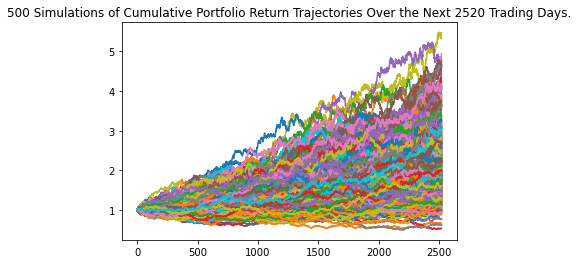

In [37]:
# Plot simulation outcomes
plot_simulaiton_outcome = mc_ten_year_retirement.plot_simulation()

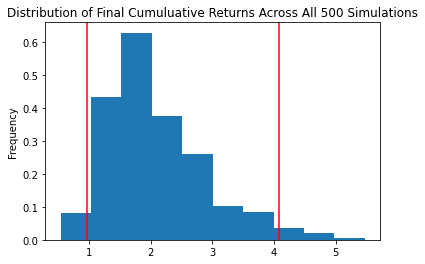

In [38]:
# Plot probability distribution and confidence intervals
ten_year_probability = mc_ten_year_retirement.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stat_ten = mc_ten_year_retirement.summarize_cumulative_return()

# Print summary statistics
print(summary_stat_ten)

count           500.000000
mean              2.094744
std               0.797664
min               0.539424
25%               1.522330
50%               1.922252
75%               2.510386
max               5.469996
95% CI Lower      0.975270
95% CI Upper      4.085645
Name: 2520, dtype: float64


In [40]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_stat_ten[8] * initial_investment,2)
ci_upper_ten = round(summary_stat_ten[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $58516.23 and $245138.72
